# 3.2 Introduction

# 3.3 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from scipy import signal

pd.set_option("display.precision", 8)

# 3.4 Load The Data

## 3.4.1 Resampled data in us

In [2]:
file_us = '../data/train_us_section.pkl'
file_ms = '../data/train_ms_section.pkl'


In [3]:
df_us = pd.read_pickle(file_us)
df_us.head().T

,0,1,2,3,4
ttf_us,1.391499,1.3915,1.392495,1.392496,1.392497
mean,4.8097826,4.2970522,5.5263158,4.750275,4.8943894
median,5,4,6,5,5
std,2.6587619,2.6671768,2.6743311,3.164769,3.193789
iqr,4,3,3,4,4
...,...,...,...,...,...
f_sec6,0.14081957,0.13523299,0,0.13916917,0.38091389
f_sec7,0.11068027,0.042138271,0,0.23241923,0.075942986
f_sec8,0.053483838,0.15320002,0,0.094303356,0.050370144
f_sec9,0.12304354,0.11498511,0,0.042020102,0.052588085


In [4]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ttf_us         440 non-null    float64
 1   mean           440 non-null    float64
 2   median         440 non-null    float64
 3   std            440 non-null    float64
 4   iqr            440 non-null    float64
 5   range          440 non-null    int64  
 6   mean_lag_1     440 non-null    float64
 7   median_lag_1   440 non-null    float64
 8   std_lag_1      440 non-null    float64
 9   iqr_lag_1      440 non-null    float64
 10  range_lag_1    440 non-null    float64
 11  mean_lag_2     440 non-null    float64
 12  median_lag_2   440 non-null    float64
 13  std_lag_2      440 non-null    float64
 14  iqr_lag_2      440 non-null    float64
 15  range_lag_2    440 non-null    float64
 16  mean_lag_3     440 non-null    float64
 17  median_lag_3   440 non-null    float64
 18  std_lag_3 

## 3.4.2 Resampled data in ms

In [5]:
df_ms = pd.read_pickle(file_ms)
df_ms.head().T

,0,1,2,3,4
ttf_ms,1.3915,1.3925,1.3936,1.3947,1.3957
mean,4.5820745,5.059082,4.9130859,4.7546387,4.6655273
median,5,5,5,5,5
std,2.6733378,3.1826645,3.485293,6.2718709,2.7511246
iqr,3,4,4,7,4
...,...,...,...,...,...
f_sec6,0.14306865,0.26063663,0.4409548,0.53825017,0.22637907
f_sec7,0.11916197,0.13392263,0.17125129,0.12567864,0.14710399
f_sec8,0.064703889,0.064565389,0.044688455,0.028706517,0.081306024
f_sec9,0.11016257,0.056461049,0.038616677,0.038198763,0.072775448


# 3.5 Explore The Data

## 3.5.1 Scatterplots of features against target

In [6]:
# define useful function to create scatterplots of time_to_failure against desired columns
def scatterplots(df, columns, ncol=None, figsize=(15, 20)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = df.columns[0],  data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel= df.columns[0])
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [7]:
td_features_ms = df_ms.columns[1:56]
td_features_us = df_us.columns[1:56]

fd_features_ms = df_ms.columns[58:]
fd_features_us = df_us.columns[58:]


### 3.5.1.1 Time domain features with us sampling

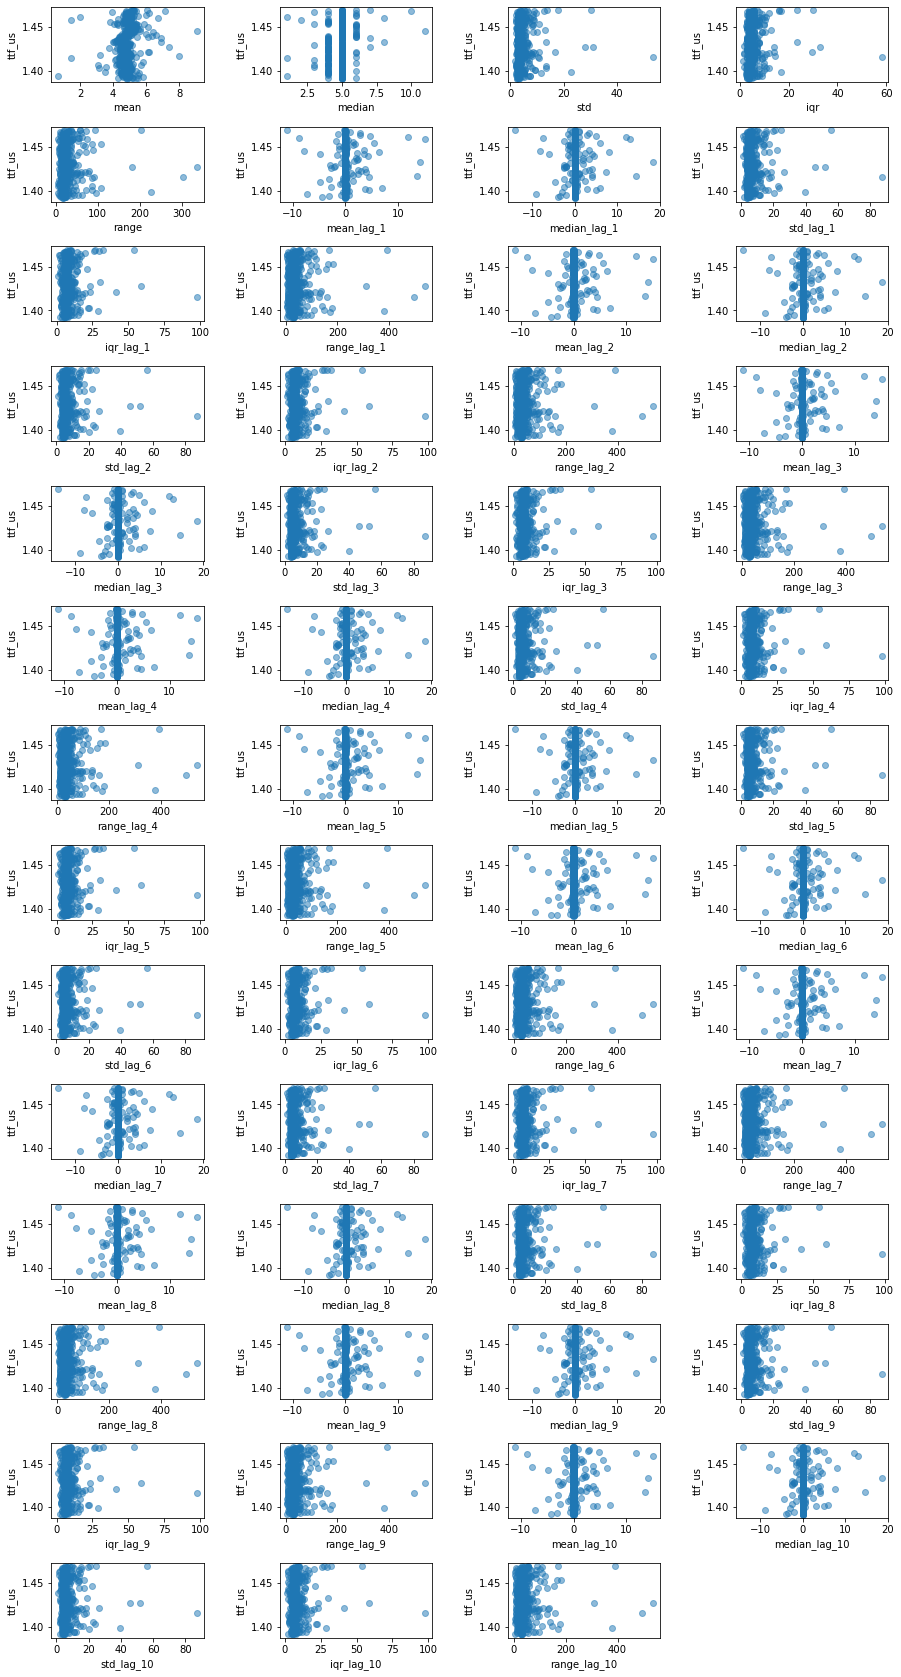

In [9]:
scatterplots(df_us, td_features_us, ncol=4, figsize=(15, 30))

### 3.5.1.1 Frequencyt domain features with us sampling

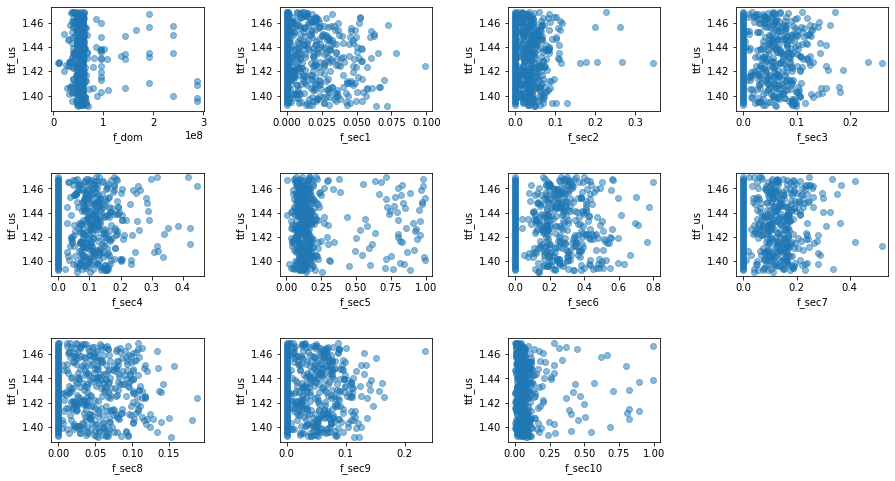

In [10]:
scatterplots(df_us, fd_features_us, ncol=4, figsize=(15, 8))

### 3.5.1.3 Time domain features with ms sampling

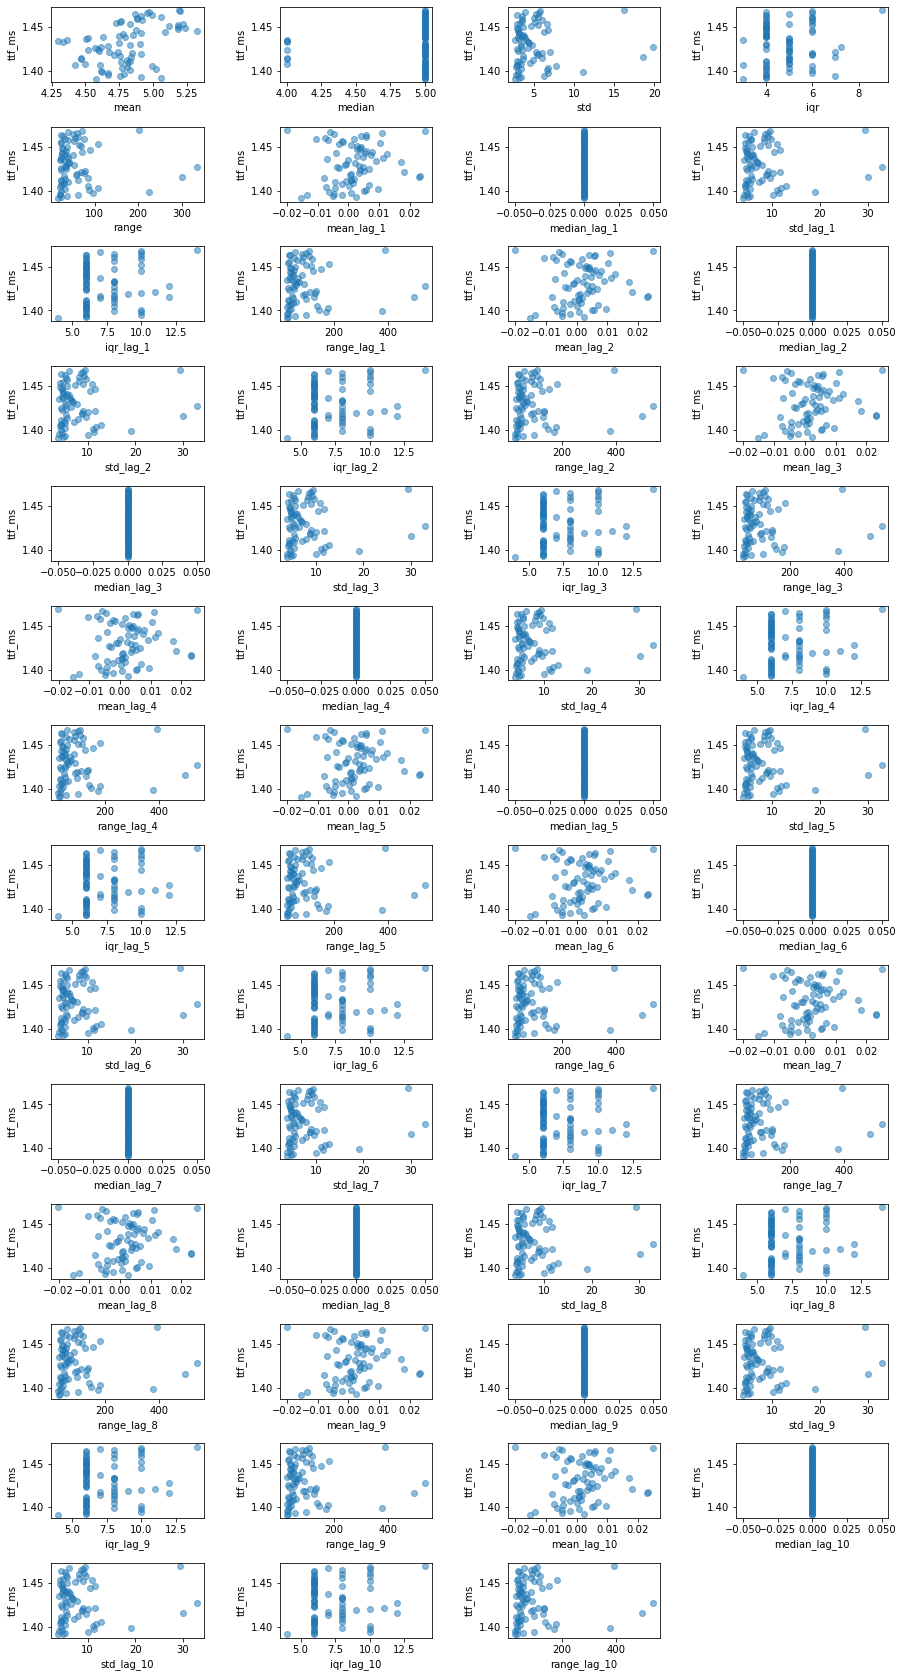

In [12]:
scatterplots(df_ms, td_features_ms, ncol=4, figsize=(15, 30))

### 3.5.1.4 Frequency domain features with ms sampling

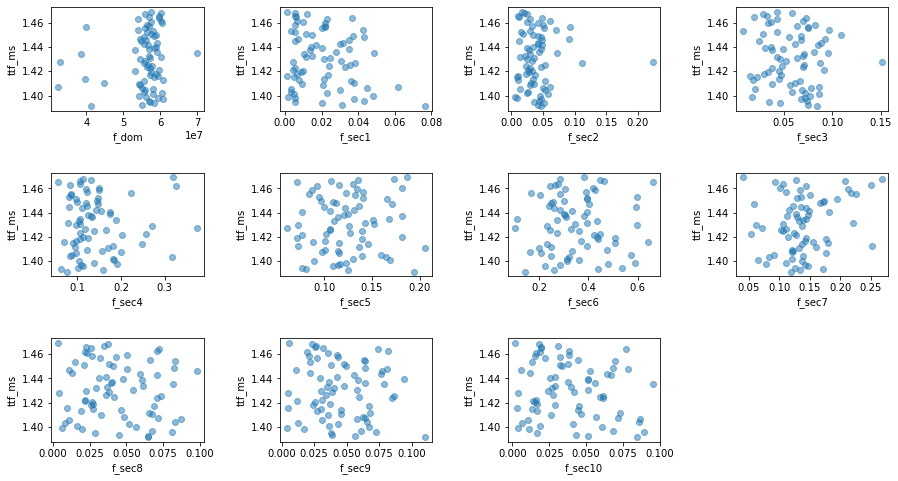

In [13]:
scatterplots(df_ms, fd_features_ms, ncol=4, figsize=(15, 8))

Summary: ms sampling is a little coarse